In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns

In [3]:
#Lendo dados
drogas_final = pd.read_csv('Dados/GESEG_SBX_DROGA_EXPORT.csv', encoding = 'latin-1', sep = ';', index_col=0)

In [4]:
#Pivotando valor "QUANTIDADE" da coluna "ATRIBUTOS" com o mesmo "NRO_INT_OBJETO"
drogas_final_pivot = drogas_final.pivot(index="NRO_INT_OBJETO", columns="ATRIBUTO", values="QUANTIDADE")

In [5]:
#Agrupando dados com o mesmo "K93_NRO_INT_OBJETO"
#Foi preciso utilizar "agg('min')" pois apenas groupby()...
#retorna um objeto iterável 
dg2_final = drogas_final.groupby(["NRO_INT_OBJETO"]).agg('min')

c:\Projetos\GESeg.estagiarios\venv\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  return f(*args, **kwargs)


In [6]:
#Ordenando por "K93_NRO_INT_OBJETO"
dg2_final_sorted = dg2_final.sort_values(by=['NRO_INT_OBJETO'])
drogas_pivot_final_sorted = drogas_final_pivot.sort_values(by=['NRO_INT_OBJETO'])

In [7]:
#Concatenando as duas tabelas
try_1_final = pd.concat([dg2_final_sorted, drogas_pivot_final_sorted],axis=1)

In [8]:
#Atribuindo a tabela resultado "try_1" com um index numérico
resultado = try_1_final.reset_index()

In [9]:
resultado

,NRO_INT_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TIPO_OBJETO,ATRIBUTO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
0,11228824,2009,3209,1025,Drogas,Cor Predominante,Amarelo,NaN,"0,42",NaN,4,Não soube informar,NaN
1,19338359,2018,3315,5,Maconha,Cor Predominante,Verde,NaN,"2,20",NaN,1,Tijolo(s),Grama
2,19344958,2018,3319,5,Maconha,Cor Predominante,Verde,NaN,"14,20",NaN,2,Porção(es),Grama
3,19352770,2018,3139,756,Cocaína,Cor Predominante,Branco,NaN,"0,80",NaN,1,Porção(es),Grama
4,19352780,2018,3143,5,Maconha,Cor Predominante,Verde,NaN,"1,60",NaN,1,Cigarro(s),Grama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113226,24126969,2021,2148,5,Maconha,Cor Predominante,Verde,NaN,"415,00",NaN,1,Porção(es),Grama
113227,24126972,2021,2148,5,Maconha,Cor Predominante,Verde,NaN,"5,00",NaN,1,Porção(es),Grama
113228,24126984,2021,8335,756,Cocaína,Cor Predominante,Branco,aproximadamente 23 gramas de pinos de cocaína,NaN,NaN,36,Unidade(s),Grama
113229,24127010,2021,14951,5,Maconha,Cor Predominante,Verde,Um tijolo de erva verde semelhante a maconha p...,"642,00",NaN,1,Tijolo(s),Grama


In [10]:
#Renomeando Coluans
resultado = resultado.rename(columns={"NRO_INT_OBJETO": "CHAVE_OBJETO", "TIPO_OBJETO": "TXT_TIPO_OBJETO"})

In [10]:
#resultado['Peso Unitário'].isin(['.']).iloc()
#resultado['Peso Unitário'] = pd.to_numeric(resultado['Peso Unitário'], errors='coerce')
#resultado.iloc[[2129]]

In [11]:
#Mudando o float do padrão brasileiro para o americano
resultado['Peso Unitário'] = pd.to_numeric(resultado['Peso Unitário'], errors='coerce')
resultado['Peso Total'] = pd.to_numeric(resultado['Peso Total'], errors='coerce')

#Trocando dados NaN por 0
resultado['Peso Unitário'] = resultado['Peso Unitário'].fillna(0)
resultado['Peso Total'] = resultado['Peso Total'].fillna(0)


#Trocando o tipo de dado para float
resultado['Peso Total']  = resultado['Peso Total'].astype(float)
resultado['Peso Unitário']  = resultado['Peso Unitário'].astype(float)

In [12]:
resultado['Peso Unitário'].value_counts()

0.0000      111389
1.0000         285
0.5000         173
2.0000         119
0.2000         114
0.3000          85
5.0000          72
0.4000          68
0.1000          64
3.0000          63
0.7000          52
0.6000          46
0.8000          44
0.9000          35
1.5000          32
10.0000         28
1.2000          27
4.0000          26
1.1000          25
1.3000          25
1.4000          18
2.5000          17
1.8000          13
15.0000         12
1.7000          11
0.0200          10
0.0100          10
4.3000           9
2.2000           9
0.0500           9
2.6000           8
3.8000           8
1.6000           7
2.4000           7
7.0000           7
3.5000           6
2.8000           6
1.9000           6
6.0000           6
12.0000          6
3.3000           6
2.1000           5
2.3000           5
9.0000           5
4.2000           5
3.2000           5
20.0000          4
2.7000           4
18.0000          4
4.5000           4
4.4000           4
25.0000          4
3.4000      

In [13]:
#Criando um DataFrame da quantidade de cores em "Cir Predominante"
cores = resultado['Cor Predominante'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
#Inverteu indices por colunas
cores = cores.T
#Definindo nome das colunas
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0]
                             ,5:cores[5][0],6:cores[6][0],7:cores[7][0],8:cores[8][0],9:cores[9][0]
                             ,10:cores[10][0], 11:cores[11][0],12:cores[12][0]})
#Excluiu a linha index que repetia o nome das colunas
cores = cores.iloc[1:]

#Criando outro DataFrame de cores mas ao invés da quantidade, com as frequências de ocorrencia por cor
cores1 = resultado['Cor Predominante'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0]
                             ,5:cores1[5][0],6:cores1[6][0],7:cores1[7][0],8:cores1[8][0],9:cores1[9][0]
                             ,10:cores1[10][0], 11:cores1[11][0],12:cores1[12][0]})

#Criando uma lista com ambos DataFrames
lista = [cores,cores1]
#Concatenando os DataFrames
cores2 = pd.concat(lista)
#Criando um novo index numérico
cores2 = cores2.reset_index(drop=True)
#Removendo a linha repetida com o nome das cores
cores2 = cores2.drop([1], axis = 0)

#Mudando o nome dos index
#(Giuliano) mudei de % para frequência
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequencia"})
cores2

,Verde,Branco,Amarelo,Marrom,Bege,Incolor,Cinza,Preto,Azul,Prateado,Laranja,Vermelho,Cobreado,13,14,15,16,17
Quantidade,53192,31096,17331,6545,2210,565,543,415,260,224,186,174,161,150,109,34,27,9
Frequencia,0.469765,0.274624,0.153059,0.057802,0.019518,0.00499,0.004796,0.003665,0.002296,0.001978,0.001643,0.001537,0.001422,0.001325,0.000963,0.0003,0.000238,0.000079


Text(0.5, 1.0, 'Cor Predominante')

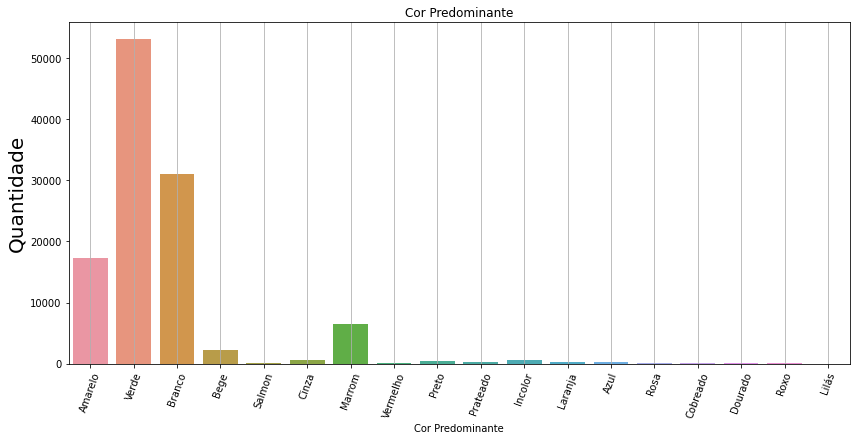

In [14]:
#Mudanças:
#Linhas comentadas e setx irrelevantes excluídas
#Criando um novo DataFrame a partir de "resultado"
stores_df = resultado

#Criando um plot e outros subplots
f, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(x="Cor Predominante", data=stores_df, ax=ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
ax1.set_ylabel("Quantidade",fontsize=20)
plt.tight_layout()
plt.grid(axis='x')
plt.title('Cor Predominante')

In [15]:
#Criando DataFrame cores a partir da quantidade de "Tipo de Embalagem"
cores = resultado['Tipo de Embalagem'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0]
                             ,5:cores[5][0],6:cores[6][0],7:cores[7][0],8:cores[8][0],9:cores[9][0]
                             ,10:cores[10][0], 11:cores[11][0],12:cores[12][0]})
cores = cores.iloc[1:]

#Criando outro DataFrame de cores mas ao invés da quantidade, com as frequências de Tipos de embalagem
cores1 = resultado['Tipo de Embalagem'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0]
                             ,5:cores1[5][0],6:cores1[6][0],7:cores1[7][0],8:cores1[8][0],9:cores1[9][0]
                             ,10:cores1[10][0], 11:cores1[11][0],12:cores1[12][0]})

#Concatenando o DF com os dois iniciais
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequencia"})
#PROBLEMA
cores2 = cores2.rename(columns={13:'Maço(s)', 14:'Kit(s)'})
#Lote == maço?
cores2

,Porção(es),Cigarro(s),Tijolo(s),Unidade(s),Saco(s),Pacote(s),Não soube informar,Frasco(s),Comprimido(s),Caixa(s),Ponto(s),Maço(s),Lata(s),Maço(s),Kit(s),15,16,17,18
Quantidade,80822,9302,7676,7478,2185,1682,1557,1163,488,359,172,165,66,34,30,25,15,11,1
Frequencia,0.71378,0.082151,0.067791,0.066042,0.019297,0.014855,0.013751,0.010271,0.00431,0.003171,0.001519,0.001457,0.000583,0.0003,0.000265,0.000221,0.000132,0.000097,0.000009


Text(0.5, 1.0, 'Embalagem')

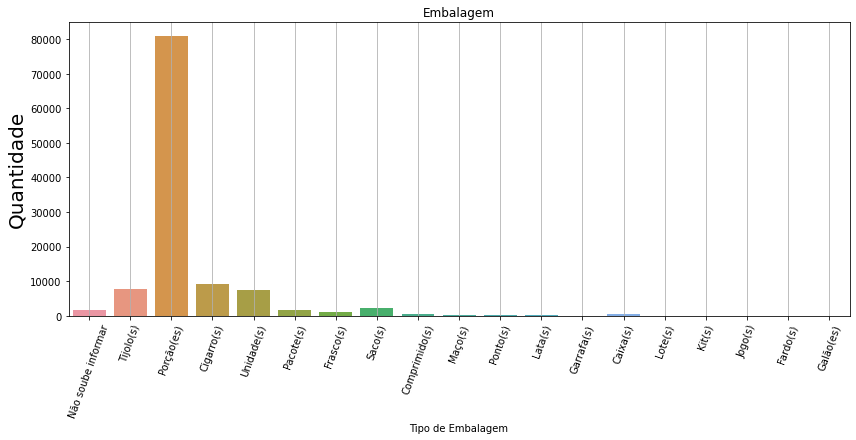

In [16]:
#Plotando os gráficos
#Mudanças: Linhas palettes irrelevantes para o código excluídas
#          ax2.set(xlabel)irrelevante

stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(x="Tipo de Embalagem", data=stores_df, ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.tight_layout()
plt.grid(axis='x')
plt.title('Embalagem')

In [17]:
#Criando DataFrame a partir de "Unidade de Peso"
cores = resultado['Unidade de Peso'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0],4:cores[4][0],5:cores[5][0]})
cores = cores.iloc[1:]

#Criando outro DataFrame para as frequências de "Unidade de Peso"
cores1 = resultado['Unidade de Peso'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0],4:cores1[4][0],5:cores1[5][0]
                             })
#Concatenando tabelas
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequência"})
cores2

,Grama,Não soube informar,Quilograma,Miligrama,Decigrama,Tonelada
Quantidade,89308,4720,1474,1200,288,5
Frequência,0.920748,0.048662,0.015197,0.012372,0.002969,0.000052


Text(0.5, 1.0, 'Unidade de Peso')

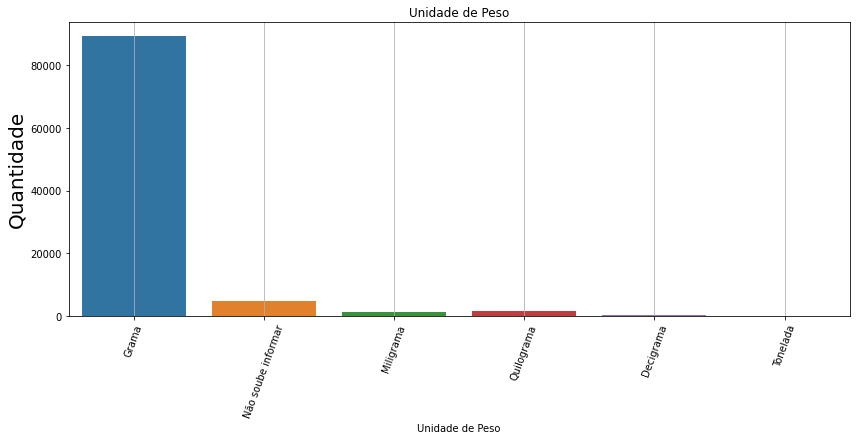

In [18]:
#Mudanças: Linhas palettes irrelevantes para o código excluídas
#          ax2.set(xlabel)irrelevante
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
palette ={"Verde": "green", "Marrom": "brown", "Branco": "white", "Amarelo": "yellow","Cinza":'grey',"Dourado":'gold',"Laranja":"orange","Azul":"Blue","Vermelho":"Red",'Bege':'beige',"Preto":"black", "Incolor":"blue", "Rosa":"pink"}

sns.countplot(x="Unidade de Peso", data=stores_df, ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Unidade de Peso')

In [19]:
sem_info = resultado.loc[resultado['Unidade de Peso'] == 'Não soube informar']
sem_info

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,ATRIBUTO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
32,19555031,2018,1366,1025,Drogas,Cor Predominante,Branco,NaN,0.0,0.0,2,Cigarro(s),Não soube informar
35,19588592,2018,4265,756,Cocaína,Cor Predominante,Branco,NaN,0.0,0.0,10,Unidade(s),Não soube informar
49,19617791,2018,5616,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,1,Cigarro(s),Não soube informar
112,19749184,2018,4243,756,Cocaína,Cor Predominante,Branco,NaN,0.0,0.0,1,Porção(es),Não soube informar
127,19763249,2018,10820,757,Crack,Cor Predominante,Amarelo,NaN,0.0,0.0,2,Unidade(s),Não soube informar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112948,24121136,2021,11613,756,Cocaína,Cor Predominante,Branco,"01 (um) pino, cor transparente, contendo pó br...",0.0,0.0,1,Unidade(s),Não soube informar
112961,24121386,2021,3088,1025,Drogas,Cor Predominante,Branco,três pinos de substância semelhante a cocaína,0.0,0.0,3,Não soube informar,Não soube informar
113095,24125450,2021,4053,757,Crack,Cor Predominante,Amarelo,Seis porções maiores contendo diversas micro p...,0.0,0.0,6,Porção(es),Não soube informar
113204,24126572,2021,2961,1025,Drogas,Cor Predominante,Verde,uma trouxinha de susbtancia semelhante a maconha,0.0,0.0,1,Não soube informar,Não soube informar


In [20]:
#Criando um DataFrame com "Unidade de Peso" == "Não soube informar"
sem_info = resultado.loc[resultado['Unidade de Peso'] == 'Não soube informar']
sem_info = sem_info.reset_index(drop=True)

In [21]:
#Criando um DataFrame com "Unidade de Peso" diferente de "Não soube informar"
com_info = resultado.loc[resultado['Unidade de Peso'] != 'Não soube informar']
com_info = com_info.reset_index(drop= True)

In [22]:
#Criando um DataFrame porcao com "Tipo de Embalagem" sendo "Porção(es)" 
#"Unidade de Peso" sendo "Grama"
#"Peso Unitário" não nulo
porcao = com_info.loc[com_info['Tipo de Embalagem'] == 'Porção(es)']
porcao = porcao.loc[porcao['Unidade de Peso'] == 'Grama']
porcao = porcao.loc[porcao['Peso Unitário'].notna()]
porcao = porcao.reset_index(drop=True)

In [23]:
#Mudando o tipo de dado da Coluna "Peso Unitário" do DataFrame porcao, para o tipo float
porcao['Peso Unitário'] = porcao['Peso Unitário'].astype(float)

In [24]:
#Mostrando Média, mediana e quartil
print('Média')
print(porcao['Peso Unitário'].mean())
print('Mediana')
print(porcao['Peso Unitário'].median())
print('Quartil')
print(porcao['Peso Unitário'].quantile(0.25))

Média
0.07565339938910824
Mediana
0.0
Quartil
0.0


In [26]:
#Criando o Data_Frame porcao_sem
#Partindo do DataFrame sem_info
#Apenas quando "Tipo de Embalagem" for "Porção(es)"
porcao_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Porção(es)']
#Aletrando "Unidade de Peso" de:
#Não soube informar -> Grama
porcao_sem['Unidade de Peso'] = 'Grama'
#Tornando a coluna "Peso Unitário" como a sua mediana
porcao_sem['Peso Unitário'] = porcao['Peso Unitário'].median()
porcao_sem

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,ATRIBUTO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
3,19749184,2018,4243,756,Cocaína,Cor Predominante,Branco,NaN,0.0,0.0,1,Porção(es),Grama
5,19809985,2018,3246,756,Cocaína,Cor Predominante,Branco,NaN,0.0,0.0,16,Porção(es),Grama
6,19810013,2018,3246,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,3,Porção(es),Grama
7,19810020,2018,3246,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,24,Porção(es),Grama
10,19963555,2018,2099,1025,Drogas,Cor Predominante,Verde,substância com carac. de maconha,0.0,0.0,1,Porção(es),Grama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,24118663,2021,4684,757,Crack,Cor Predominante,Amarelo,6 pedras de crack,0.0,0.0,6,Porção(es),Grama
4708,24119585,2021,4847,1025,Drogas,Cor Predominante,Verde,Uma porção de substância semelhante a maconha.,0.0,0.0,1,Porção(es),Grama
4709,24119588,2021,4848,1025,Drogas,Cor Predominante,Verde,2 porções de substância semelhante a maconha,0.0,0.0,2,Porção(es),Grama
4711,24120709,2021,97,5,Maconha,Cor Predominante,Verde,Uma porção de substância com características d...,0.0,0.0,1,Porção(es),Grama


In [27]:
#Criando o DF cigarro_com
#A partir do DF com_info
cigarro_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Cigarro(s)']
cigarro_com = cigarro_com.loc[cigarro_com['Unidade de Peso'] == 'Grama']
cigarro_com = cigarro_com.loc[cigarro_com['Peso Unitário'].notna()]
cigarro_com = cigarro_com.reset_index(drop=True)
cigarro_com['Peso Unitário'] = cigarro_com['Peso Unitário'].astype(float)
cigarro_com

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,ATRIBUTO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
0,19352780,2018,3143,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,1,Cigarro(s),Grama
1,19359630,2018,2674,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,1,Cigarro(s),Grama
2,19359638,2018,2676,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,1,Cigarro(s),Grama
3,19366295,2018,3267,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,3,Cigarro(s),Grama
4,19408555,2018,3598,5,Maconha,Cor Predominante,Verde,NaN,0.0,0.0,1,Cigarro(s),Grama
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,24123258,2021,3917,1025,Drogas,Cor Predominante,Marrom,TRÊS CIGARROS COM SUBSTÂNCIA COM CARACTERÍSTIC...,0.0,0.0,3,Cigarro(s),Grama
5233,24123757,2021,6311,5,Maconha,Cor Predominante,Marrom,"UM CIGARRO DE SUBSTÂNCIA SEMELHANTE À MACONHA,...",0.0,0.0,1,Cigarro(s),Grama
5234,24124156,2021,919,5,Maconha,Cor Predominante,Marrom,01 CIGARRO ARTESANAL DE MATERIAL SEMELHANTE A ...,0.0,0.0,1,Cigarro(s),Grama
5235,24124364,2021,6337,5,Maconha,Cor Predominante,Branco,Um cigarro artesanal de substância com caracte...,0.0,0.0,1,Cigarro(s),Grama


In [28]:
#Printando estatisticas
print('Média')
print(cigarro_com['Peso Unitário'].mean())
print('Mediana')
print(cigarro_com['Peso Unitário'].median())
print('Quartil')
print(cigarro_com['Peso Unitário'].quantile(0.25))

Média
0.07330761886576284
Mediana
0.0
Quartil
0.0


In [29]:
#Criando o DF cigarro_sem
cigarro_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Cigarro(s)']
cigarro_sem['Unidade de Peso'] = 'Grama'
cigarro_sem['Peso Unitário'] = cigarro_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [30]:
unidade_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Unidade(s)']
unidade_com = unidade_com.loc[unidade_com['Unidade de Peso'] == 'Grama']
unidade_com = unidade_com.loc[unidade_com['Peso Unitário'].notna()]
unidade_com = unidade_com.reset_index(drop=True)
unidade_com['Peso Unitário'] = unidade_com['Peso Unitário'].astype(float) 
print('Média')
print(unidade_com['Peso Unitário'].mean())
print('Mediana')
print(unidade_com['Peso Unitário'].median())
print('Quartil')
print(unidade_com['Peso Unitário'].quantile(0.25))

Média
0.01832659808963997
Mediana
0.0
Quartil
0.0


In [31]:
unidade_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Unidade(s)']
unidade_sem['Unidade de Peso'] = 'Grama'
unidade_sem['Peso Unitário'] = unidade_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [32]:
tijolo_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Tijolo(s)']
tijolo_com = tijolo_com.loc[tijolo_com['Unidade de Peso'] == 'Grama']
tijolo_com = tijolo_com.loc[tijolo_com['Peso Unitário'].notna()]
tijolo_com = tijolo_com.reset_index(drop=True)
tijolo_com['Peso Unitário'] = tijolo_com['Peso Unitário'].astype(float) 
print('Média')
print(tijolo_com['Peso Unitário'].mean())
print('Mediana')
print(tijolo_com['Peso Unitário'].median())
print('Quartil')
print(tijolo_com['Peso Unitário'].quantile(0.25))

Média
0.315161833039577
Mediana
0.0
Quartil
0.0


In [33]:
tijolo_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Tijolo(s)']
tijolo_sem['Unidade de Peso'] = 'Grama'
tijolo_sem['Peso Unitário'] = tijolo_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [34]:
frasco_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Frasco(s)']
frasco_com = frasco_com.loc[frasco_com['Unidade de Peso'] == 'Grama']
frasco_com = frasco_com.loc[frasco_com['Peso Unitário'].notna()]
frasco_com = frasco_com.reset_index(drop=True)
frasco_com['Peso Unitário'] = frasco_com['Peso Unitário'].astype(float) 
print('Média')
print(frasco_com['Peso Unitário'].mean())
print('Mediana')
print(frasco_com['Peso Unitário'].median())
print('Quartil')
print(frasco_com['Peso Unitário'].quantile(0.25))

Média
0.02309368191721133
Mediana
0.0
Quartil
0.0


In [35]:
frasco_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Frasco(s)']
frasco_sem['Unidade de Peso'] = 'Grama'
frasco_sem['Peso Unitário'] = frasco_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [36]:
pacote_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Pacote(s)']
pacote_com = pacote_com.loc[pacote_com['Unidade de Peso'] == 'Grama']
pacote_com = pacote_com.loc[pacote_com['Peso Unitário'].notna()]
pacote_com = pacote_com.reset_index(drop=True)
pacote_com['Peso Unitário'] = pacote_com['Peso Unitário'].astype(float) 
print('Média')
print(pacote_com['Peso Unitário'].mean())
print('Mediana')
print(pacote_com['Peso Unitário'].median())
print('Quartil')
print(pacote_com['Peso Unitário'].quantile(0.25))

Média
1.4851367331855136
Mediana
0.0
Quartil
0.0


In [37]:
pacote_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Pacote(s)']
pacote_sem['Unidade de Peso'] = 'Grama'
pacote_sem['Peso Unitário'] = pacote_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [38]:
saco_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Saco(s)']
saco_com = saco_com.loc[saco_com['Unidade de Peso'] == 'Grama']
saco_com = saco_com.loc[saco_com['Peso Unitário'].notna()]
saco_com = saco_com.reset_index(drop=True)
saco_com['Peso Unitário'] = saco_com['Peso Unitário'].astype(float) 
print('Média')
print(saco_com['Peso Unitário'].mean())
print('Mediana')
print(saco_com['Peso Unitário'].median())
print('Quartil')
print(saco_com['Peso Unitário'].quantile(0.25))

Média
0.29576822233875194
Mediana
0.0
Quartil
0.0


In [39]:
saco_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Saco(s)']
saco_sem['Unidade de Peso'] = 'Grama'
saco_sem['Peso Unitário'] = saco_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [40]:
ponto_com = com_info.loc[com_info['Tipo de Embalagem'] == 'Ponto(s)']
ponto_com = ponto_com.loc[ponto_com['Unidade de Peso'] == 'Grama']
ponto_com = ponto_com.loc[ponto_com['Peso Unitário'].notna()]
ponto_com = ponto_com.reset_index(drop=True)
ponto_com['Peso Unitário'] = ponto_com['Peso Unitário'].astype(float) 
print('Média')
print(ponto_com['Peso Unitário'].mean())
print('Mediana')
print(ponto_com['Peso Unitário'].median())
print('Quartil')
print(ponto_com['Peso Unitário'].quantile(0.25))

Média
0.017307692307692305
Mediana
0.0
Quartil
0.0


In [41]:
ponto_sem = sem_info.loc[sem_info['Tipo de Embalagem'] == 'Ponto(s)']
ponto_sem['Unidade de Peso'] = 'Grama'
ponto_sem['Peso Unitário'] = ponto_com['Peso Unitário'].median()

C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\giu_2\Anaconda3\envs\projeto_drogas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [42]:
#Definindo um DF com todos os tipos de embalagem sem informação de "Unidade de Peso"
lista = [ponto_sem, saco_sem, tijolo_sem, unidade_sem, cigarro_sem, pacote_sem, frasco_sem, porcao_sem]
sem_info2 = pd.concat(lista)

In [43]:
#Definindo um DF 
lista = [sem_info2, com_info]
resultado = pd.concat(lista)
resultado = resultado.reset_index(drop=True)

In [44]:
resultado['Unidade de Peso'].value_counts()

Grama         93693
Quilograma     1474
Miligrama      1200
Decigrama       288
Tonelada          5
Name: Unidade de Peso, dtype: int64

In [45]:
#DF cores recebe quantidade de valores 
#Presentes na coluna "Unidade de peso" 
#Do DF resultado
cores = resultado['Unidade de Peso'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]

#Construindo DF cores1 com a frequência
cores1 = resultado['Unidade de Peso'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0]})

#Concatenando ambos os DF
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequência"})
cores2

,Grama,Quilograma,Miligrama,Decigrama,4
Quantidade,93693,1474,1200,288,5
Frequência,0.969305,0.015249,0.012415,0.00298,0.000052


Text(0.5, 1.0, 'Unidade de Peso')

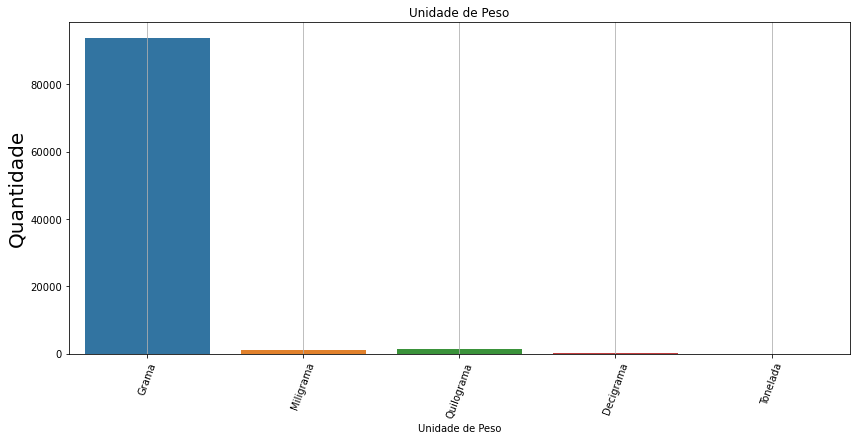

In [46]:
stores_df = resultado

f, (ax2) = plt.subplots(1, 1, figsize=(12, 6))
sns.countplot(x="Unidade de Peso", data=stores_df, ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
ax2.set_ylabel("Quantidade",fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Unidade de Peso')

# <h1><center>TIPO DE OBJETO</center></h1>

In [47]:
#Criando DF cores a partir de frequência do tipo do Objeto
cores = resultado['TXT_TIPO_OBJETO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]

#Criando DF cores1 com as frequências
cores1 = resultado['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#Concatenado DF para cores2
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequencias"})
#Atribuindo a coluna Crack também as frequências de C
#Não foi atribuido também Quantidade pois retornava um valor NaN
cores2['Crack']['Frequencias'] = cores2['C']['Frequencias']
cores2 = cores2.drop(['C'], axis = 1)
cores2

,Maconha,Drogas,Cocaína,Crack
Quantidade,41040,37350,20042,14464
Frequencias,0.36352,0.330835,0.177526,0.128118


Text(0.5, 1.0, 'Tipo de Objeto')

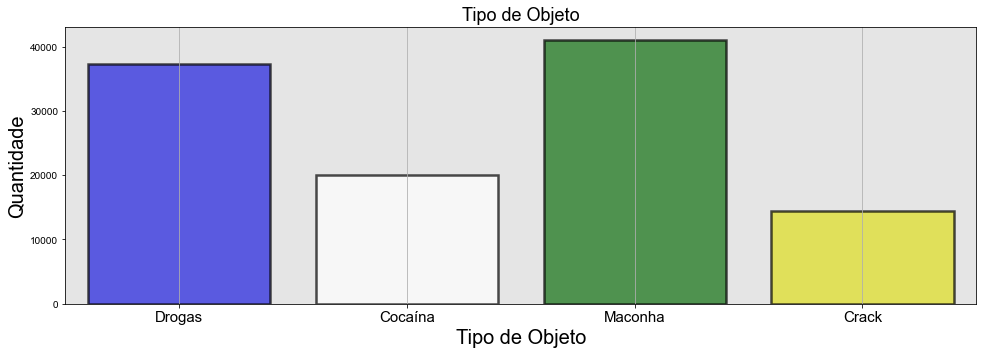

In [48]:
#Plotando gráficos
stores_df = resultado

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [49]:
#Definindo uma series Drogas
#Como resultado do tipo de objeto de resultado = Drogas
Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
#Pegando 5 linhas aleatórias da Series
Drogas.sample(5)

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,ATRIBUTO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
768,20685383,2019,4678,1025,Drogas,Cor Predominante,Verde,UM CIGARRO PARCIALMENTE CONSUMIDO COM SUBSTANC...,0.0,0.0,1,Cigarro(s),Grama
10608,20876145,2019,1672,1025,Drogas,Cor Predominante,Marrom,NaN,0.0,0.0,1,Porção(es),NaN
68784,22872712,2020,16874,1025,Drogas,Cor Predominante,Verde,"uma porção de maconha pesando 2,30 gramas",0.0,0.0,1,Porção(es),Grama
12276,20982345,2019,2432,1025,Drogas,Cor Predominante,Branco,Um papelote de cor verde contendo uma substânc...,0.0,0.0,1,Porção(es),Grama
27163,21601737,2019,3684,1025,Drogas,Cor Predominante,Branco,NaN,0.0,0.0,22,Porção(es),Grama


In [50]:
import unidecode

Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
Outras = resultado.loc[resultado['TXT_TIPO_OBJETO'] != 'Drogas']
Outras = Outras.reset_index(drop= True)

#DF com descrição nula
DrogasNA = Drogas.loc[Drogas['Descrição'].isnull()]
DrogasNA = DrogasNA.reset_index(drop=True)

#Excluindo descrição nula do DF Drogas
Drogas = Drogas.loc[Drogas['Descrição'].notna()]
Drogas = Drogas.reset_index(drop=True)

#Excluindo virgulas e pontos
x = 0
while x < len(Drogas):
    frase = Drogas['Descrição'][x]
    frase = frase.replace(',','')
    frase = frase.replace('.','')
    frase = unidecode.unidecode(frase)
    Drogas['Descrição'][x] = frase
    x += 1
    
Drogas['Descrição'] = Drogas['Descrição'].str.lower()

C:\Users\giu_2\AppData\Local\Temp/ipykernel_10164/1374628422.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Drogas['Descrição'][x] = frase


In [51]:
#Tratando ajustes de drogas

def analizer(x):
    
    if 'maconha' in x:
        return 'Maconha'
    elif 'canabis' in x:
        return 'Maconha'
    elif 'cannabis' in x:
        return 'Maconha'
    elif 'crack' in x:
        return 'Crack'
    elif 'cocaina' in x:
        return 'Cocaína'
    else:
        return 'Drogas'
    
Drogas['RECLASSIFICAÇÃO'] = Drogas['Descrição'].apply(analizer)

In [52]:
Drogas['RECLASSIFICAÇÃO'].value_counts()

Maconha    17672
Cocaína     7988
Crack       5785
Drogas      3903
Name: RECLASSIFICAÇÃO, dtype: int64

Text(0.5, 1.0, 'Tipo de Objeto')

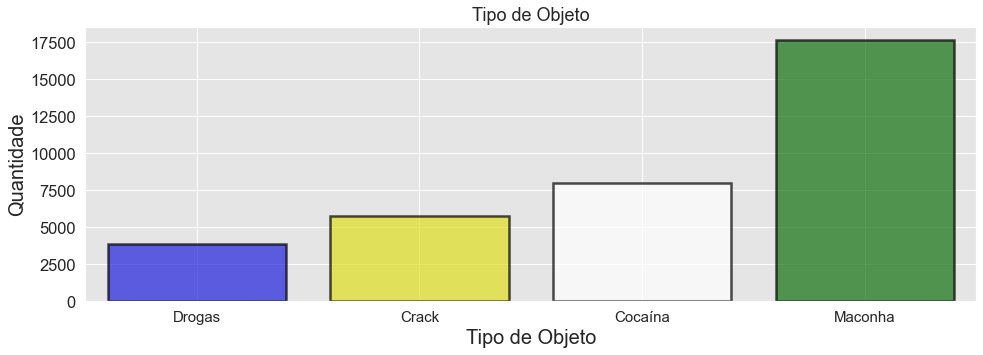

In [53]:
stores_df = Drogas

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="RECLASSIFICAÇÃO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [54]:
#DF cores com as drogas
cores = Drogas['RECLASSIFICAÇÃO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]

#Frequência das drogas
cores1 = Drogas['RECLASSIFICAÇÃO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#Concatenando DF
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequencia"})
cores2['Drogas']['Frequencia'] = cores2['D']['Frequencia']
cores2 = cores2.drop(['D'], axis = 1)
cores2

,Maconha,Cocaína,Crack,Drogas
Quantidade,17672,7988,5785,3903
Frequencia,0.499943,0.225982,0.163658,0.110416


In [56]:
Drogas.to_csv('Dados/Teste_Drogas_ML.csv')